In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('raw_data/RAW_recipes.csv')
df.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df.nutrition.str.split(",",expand=True) 
df['calories'] =  df['calories'].apply(lambda x: x.replace('[','')) 
df['carbohydrates (PDV)'] =  df['carbohydrates (PDV)'].apply(lambda x: x.replace(']','')) 
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')
df.drop(['id', 'contributor_id','submitted','tags','nutrition'], axis=1,inplace = True)
df

,name,minutes,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,55,11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,30,9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,130,6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,45,11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,190,5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,60,7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,5,1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,zydeco ya ya deviled eggs,40,7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,cookies by design cookies on a stick,29,9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [4]:
df2 = df.copy()

In [5]:
df2.drop(columns = 'description', inplace = True)

In [6]:
df2.isnull().sum()

name                   1
minutes                0
n_steps                0
steps                  0
ingredients            0
n_ingredients          0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [7]:
df2.duplicated().sum()

0

In [8]:
df2.isnull().sum()

name                   1
minutes                0
n_steps                0
steps                  0
ingredients            0
n_ingredients          0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

<AxesSubplot:>

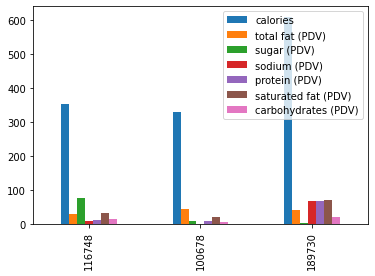

In [9]:
X = df2[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']].sample(3)
X.plot(kind='bar')

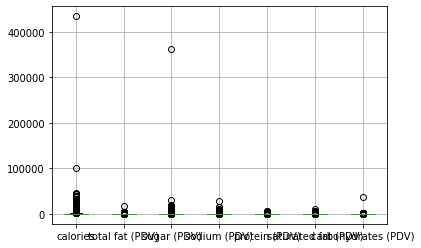

In [10]:
df2[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']].boxplot();

In [11]:
df2[['n_steps', 'n_ingredients', 'minutes', 'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']].min()

n_steps                0.0
n_ingredients          1.0
minutes                0.0
calories               0.0
total fat (PDV)        0.0
sugar (PDV)            0.0
sodium (PDV)           0.0
protein (PDV)          0.0
saturated fat (PDV)    0.0
carbohydrates (PDV)    0.0
dtype: float64

In [12]:
df2[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']].max()

calories               434360.2
total fat (PDV)         17183.0
sugar (PDV)            362729.0
sodium (PDV)            29338.0
protein (PDV)            6552.0
saturated fat (PDV)     10395.0
carbohydrates (PDV)     36098.0
dtype: float64

In [13]:
df2[['minutes', 'n_steps', 'n_ingredients']].max()

minutes          2147483647
n_steps                 145
n_ingredients            43
dtype: int64

<AxesSubplot:xlabel='minutes'>

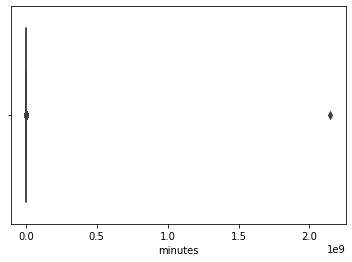

In [14]:
sns.boxplot(x=df2['minutes'])

In [15]:
df2 = df2[df2['minutes'] > 4] 
len(df2)

226357

In [16]:
df2 = df2[df2['minutes'] < 10081] 
df2[['minutes', 'n_steps', 'n_ingredients']].max()

minutes          10080
n_steps            145
n_ingredients       43
dtype: int64

<AxesSubplot:xlabel='minutes'>

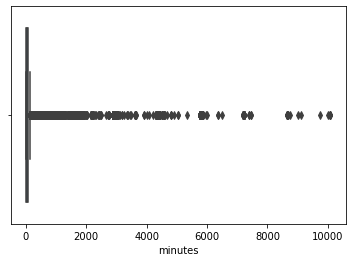

In [17]:
sns.boxplot(x=df2['minutes'])

<AxesSubplot:xlabel='calories'>

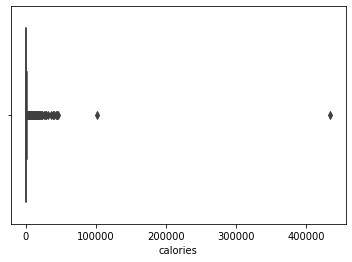

In [18]:
sns.boxplot(x=df2['calories'])

In [19]:
df2 = df2[df2['calories'] < 8000] 
df2['calories'].max()

7997.5

In [20]:
df2 = df2[df2['calories'] > 49] 
len(df2)

218111

<AxesSubplot:xlabel='calories'>

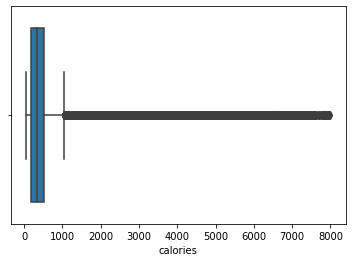

In [21]:
sns.boxplot(x=df2['calories'])

In [22]:
len(df2)

218111

<AxesSubplot:xlabel='sugar (PDV)'>

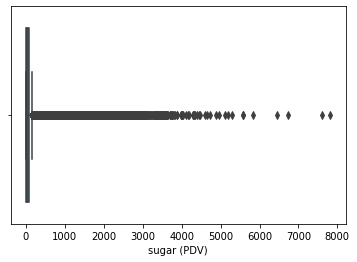

In [23]:
sns.boxplot(x=df2['sugar (PDV)'])

<AxesSubplot:xlabel='sodium (PDV)'>

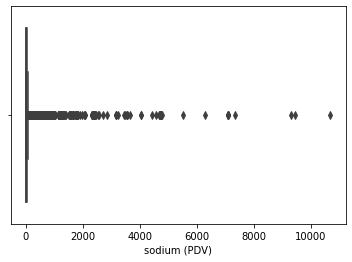

In [24]:
sns.boxplot(x=df2['sodium (PDV)'])

In [25]:
df2 = df2[df2['sodium (PDV)'] < 11000]

<AxesSubplot:xlabel='protein (PDV)'>

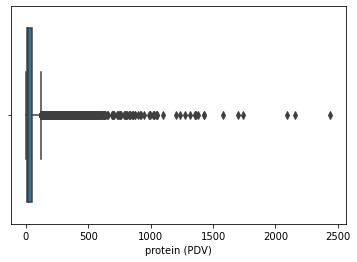

In [26]:
sns.boxplot(x=df2['protein (PDV)'])

<AxesSubplot:xlabel='saturated fat (PDV)'>

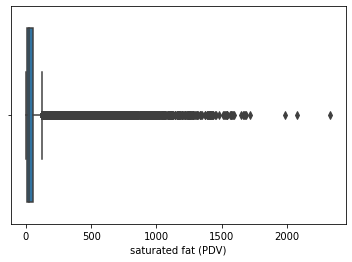

In [27]:
sns.boxplot(x=df2['saturated fat (PDV)'])

<AxesSubplot:xlabel='carbohydrates (PDV)'>

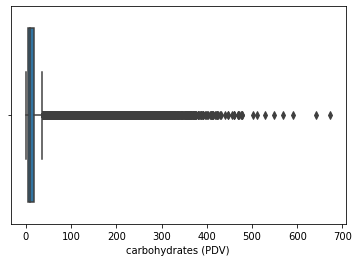

In [28]:
sns.boxplot(x=df2['carbohydrates (PDV)'])

<AxesSubplot:xlabel='n_steps'>

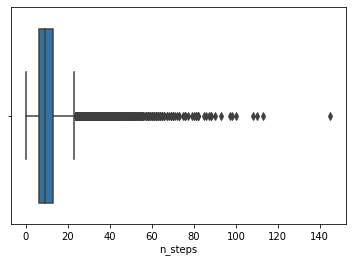

In [29]:
sns.boxplot(x=df2['n_steps'])

In [30]:
df2 = df2[df2['n_steps'] > 3]
len(df2)

201641

<AxesSubplot:xlabel='n_ingredients'>

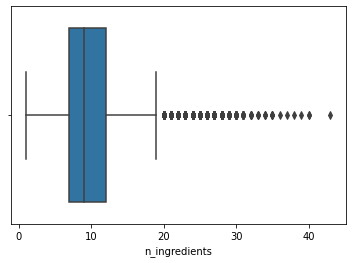

In [31]:
sns.boxplot(x=df2['n_ingredients'])

In [32]:
df2 = df2[df2['n_ingredients'] > 1]
len(df2)

201624

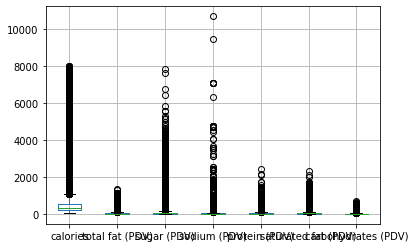

In [33]:
df2[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']].boxplot();

In [34]:
df2 = df2.dropna()
df2.isnull().sum()

name                   0
minutes                0
n_steps                0
steps                  0
ingredients            0
n_ingredients          0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [35]:
df2.describe()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,201623.000000,201623.000000,201623.000000,201623.000000,201623.000000,201623.000000,201623.000000,201623.000000,201623.000000,201623.000000
mean,84.967335,10.580504,9.434003,483.494789,36.992660,80.819911,29.443660,36.733468,47.094002,15.643706
std,243.239078,5.796675,3.685100,614.005529,56.672624,218.627187,89.518876,45.702140,81.266912,27.324560
min,5.000000,4.000000,2.000000,49.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,7.000000,7.000000,196.600000,10.000000,10.000000,6.000000,8.000000,9.000000,4.000000
50%,40.000000,9.000000,9.000000,334.500000,22.000000,25.000000,16.000000,21.000000,25.000000,9.000000
75%,70.000000,13.000000,12.000000,538.700000,43.000000,69.000000,34.000000,54.000000,56.000000,17.000000
max,10080.000000,145.000000,43.000000,7997.500000,1341.000000,7818.000000,10677.000000,2439.000000,2333.000000,673.000000


In [36]:
df2.head()

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,55,11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,30,9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,130,6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,45,11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,190,5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [37]:
len(df2)

201623

In [38]:
names = ["ketchup","mayo","smoothie", "tea", 'jam', 'jelly', 'wine', 'juice', 'lemonade', 'butter', 'sugar', 'tonic', 'dip', 'salsa', 'cookies', 'chocolate', 'ice-cream', 'drink']
new_str = '|'.join([word for word in names])
new_str

'ketchup|mayo|smoothie|tea|jam|jelly|wine|juice|lemonade|butter|sugar|tonic|dip|salsa|cookies|chocolate|ice-cream|drink'

In [39]:
df2 = df2.loc[~df2['name'].str.contains(new_str)]
len(df2)

172966

In [40]:
df2.describe()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000
mean,87.054733,10.555664,9.538019,479.477736,36.372750,72.281541,30.695015,38.486275,45.313385,15.232716
std,246.969467,5.759903,3.701847,586.441169,54.145097,201.065552,93.410219,45.550168,75.438155,26.028159
min,5.000000,4.000000,2.000000,49.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,7.000000,7.000000,204.700000,10.000000,9.000000,7.000000,9.000000,9.000000,4.000000
50%,40.000000,9.000000,9.000000,340.450000,23.000000,23.000000,17.000000,24.000000,25.000000,10.000000
75%,70.000000,13.000000,12.000000,538.900000,43.000000,62.000000,35.000000,56.000000,55.000000,17.000000
max,10080.000000,145.000000,43.000000,7997.500000,1341.000000,7611.000000,10677.000000,2154.000000,2080.000000,641.000000


In [41]:
df2['ingredients'].replace(',','', regex=True, inplace=True)
df2['ingredients'] = df2['ingredients'].astype(str).str.replace(r'\[|\]|,', '', regex=True)
df2['ingredients'] = df2['ingredients'].astype(str).str.replace(r'\'|\'|,', '', regex=True)
df2.head(5)

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,55,11,"['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ho...,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,30,9,"['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs milk s...,6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,130,6,"['brown ground beef in large pot', 'add choppe...",ground beef yellow onions diced tomatoes tomat...,13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,45,11,['place potatoes in a large pot of lightly sal...,spreadable cheese with garlic and herbs new po...,11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
6,aww marinated olives,15,4,['toast the fennel seeds and lightly crush the...,fennel seeds green olives ripe olives garlic p...,9,380.7,53.0,7.0,24.0,6.0,24.0,6.0


In [42]:
gluten = ["bread", "pittas", "bagels", "flatbreads", "rolls",
"pasta", "noodles", "cakes", "crackers", 
"biscuits", "pies", "pastry", "cereals", 
"breadcrumbs", "coatings", "croutons", "malts", 
"malt", "syrup", "flavoring", "vinegar", 
"brewers", "yeast", "beer", "spaghetti", 
"brownie", "wheat", "soy", "fries"]

new_gluten = '|'.join([word for word in gluten])

df2["gluten_free"] = np.where(
   (df2.ingredients.str.contains(new_gluten)), 
   0, 
   1
)

In [43]:
nuts = ["almonds", "nuts",
"hazelnuts", "macadamias"
"pecans", "nut"
"pistachios", "walnuts"
"peanuts", "filberts"]
new_nut = '|'.join([word for word in nuts])

df2["nut_free"] = np.where(
   (df2.ingredients.str.contains(new_nut)), 
   0, 
   1
)

In [44]:
lactose = ["milk", "yogurt", "cheese", "butter", "mozzarella", "ricotta", "cream", "sherbet"]
new_lactose = '|'.join([word for word in lactose])

df2["lactose_free"] = np.where(
   (df2.ingredients.str.contains(new_lactose)), 
   0, 
   1
)

In [45]:
df2["egg_free"] = np.where(
   (df2.ingredients.str.contains('egg')), 
   0, 
   1
)

In [46]:
vegan = ['beef', 'pork', 'lamb', 'meat', 'duck', 'egg', 'eggs', 'fish', 'cheese', 'butter', 'milk', 'cream', 'mayo', 'honey','burger','chicken','salmon', 'tuna', 'shrimp', 'octopus', 'clams', 'tilapia','goose','anchovies','squid','scallops','calamari','mussels','crab','lobster']
vegan = '|'.join([word for word in vegan])
vegan

df2["vegan"] = np.where(
   (df2.ingredients.str.contains(vegan)), 
   0, 
   1
)

In [47]:
veggie = ['beef', 'pork', 'lamb', 'meat', 'duck', 'fish','burger','chicken','salmon', 'tuna', 'shrimp', 'octopus', 'clams', 'tilapia','goose','anchovies','squid','scallops','calamari','mussels','crab','lobster']
veggie = '|'.join([word for word in veggie])
veggie

df2["veggie"] = np.where(
   (df2.ingredients.str.contains(veggie)), 
   0, 
   1
)

In [48]:
fish = ['beef', 'pork', 'lamb', 'meat', 'duck','burger','chicken', 'goose','anchovies']
fish = '|'.join([word for word in fish])

df2["fish"] = np.where(
   (df2.ingredients.str.contains(fish)), 
   0, 
   1
)

In [49]:
conditions = [
    (df2['calories'] <= 450),
    (df2['calories'] > 450) & (df2['calories'] <= 800),
    (df2['calories'] > 800)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3']

# create a new column and use np.select to assign values to it using our lists as arguments
df2['calorie_class'] = np.select(conditions, values)

In [50]:
ohe = OneHotEncoder(sparse = False)

calorie_ohe = ohe.fit_transform(df2[["calorie_class"]])

df2['low_calories'],df2['normal_calories'],df2['high_calories'] = calorie_ohe.T

In [51]:
df2.drop(columns = 'calorie_class', inplace = True)

In [52]:
df2.head()

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
0,arriba baked winter squash mexican style,55,11,"['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ho...,7,51.5,0.0,13.0,0.0,...,1,1,0,1,0,1,1,1.0,0.0,0.0
1,a bit different breakfast pizza,30,9,"['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs milk s...,6,173.4,18.0,0.0,17.0,...,1,1,0,0,0,1,1,1.0,0.0,0.0
2,all in the kitchen chili,130,6,"['brown ground beef in large pot', 'add choppe...",ground beef yellow onions diced tomatoes tomat...,13,269.8,22.0,32.0,48.0,...,1,1,0,1,0,0,0,1.0,0.0,0.0
3,alouette potatoes,45,11,['place potatoes in a large pot of lightly sal...,spreadable cheese with garlic and herbs new po...,11,368.1,17.0,10.0,2.0,...,0,1,0,1,0,1,1,1.0,0.0,0.0
6,aww marinated olives,15,4,['toast the fennel seeds and lightly crush the...,fennel seeds green olives ripe olives garlic p...,9,380.7,53.0,7.0,24.0,...,1,1,1,1,1,1,1,1.0,0.0,0.0


In [53]:
df2.to_csv('prep_data.csv', index=False)

In [54]:
df2.describe()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
count,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000
mean,87.054733,10.555664,9.538019,479.477736,36.372750,72.281541,30.695015,38.486275,45.313385,15.232716,0.626979,0.918470,0.367367,0.720448,0.149844,0.618769,0.671982,0.658673,0.229629,0.111698
std,246.969467,5.759903,3.701847,586.441169,54.145097,201.065552,93.410219,45.550168,75.438155,26.028159,0.483609,0.273649,0.482089,0.448780,0.356920,0.485691,0.469493,0.474156,0.420595,0.314996
min,5.000000,4.000000,2.000000,49.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,7.000000,7.000000,204.700000,10.000000,9.000000,7.000000,9.000000,9.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,9.000000,9.000000,340.450000,23.000000,23.000000,17.000000,24.000000,25.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,13.000000,12.000000,538.900000,43.000000,62.000000,35.000000,56.000000,55.000000,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,10080.000000,145.000000,43.000000,7997.500000,1341.000000,7611.000000,10677.000000,2154.000000,2080.000000,641.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
r_scaler = RobustScaler()
df2[['minutes', 'n_steps', 'n_ingredients', 'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)', 'gluten_free', 'nut_free', 'lactose_free', 'egg_free', 'vegan','veggie', 'fish', 'low_calories', 'normal_calories', 'high_calories' 
]] = r_scaler.fit_transform(df2[['minutes', 'n_steps', 'n_ingredients', 'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)', 'gluten_free', 'nut_free', 'lactose_free', 'egg_free', 'vegan','veggie', 'fish', 'low_calories', 'normal_calories', 'high_calories' 
]])

In [56]:
df2.describe()

,minutes,n_steps,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
count,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000,172966.000000
mean,1.045661,0.259277,0.107604,0.416002,0.405235,0.929840,0.489108,0.308219,0.441595,0.402517,-0.373021,-0.081530,0.367367,-0.279552,0.149844,-0.381231,-0.328018,-0.341327,0.229629,0.111698
std,5.488210,0.959984,0.740369,1.754761,1.640761,3.793690,3.336079,0.969153,1.639960,2.002166,0.483609,0.273649,0.482089,0.448780,0.356920,0.485691,0.469493,0.474156,0.420595,0.314996
min,-0.777778,-0.833333,-1.400000,-0.871783,-0.696970,-0.433962,-0.607143,-0.510638,-0.543478,-0.769231,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,-0.333333,-0.333333,-0.400000,-0.406194,-0.393939,-0.264151,-0.357143,-0.319149,-0.347826,-0.461538,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.666667,0.600000,0.593806,0.606061,0.735849,0.642857,0.680851,0.652174,0.538462,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,223.111111,22.666667,6.800000,22.911580,39.939394,143.169811,380.714286,45.319149,44.673913,48.538462,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [57]:
df2.head()

,name,minutes,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,gluten_free,nut_free,lactose_free,egg_free,vegan,veggie,fish,low_calories,normal_calories,high_calories
0,arriba baked winter squash mexican style,0.333333,0.333333,"['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ho...,-0.4,-0.864602,-0.696970,-0.188679,-0.607143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a bit different breakfast pizza,-0.222222,0.000000,"['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs milk s...,-0.6,-0.499850,-0.151515,-0.433962,0.000000,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,all in the kitchen chili,2.000000,-0.500000,"['brown ground beef in large pot', 'add choppe...",ground beef yellow onions diced tomatoes tomat...,0.8,-0.211400,-0.030303,0.169811,1.107143,...,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0
3,alouette potatoes,0.111111,0.333333,['place potatoes in a large pot of lightly sal...,spreadable cheese with garlic and herbs new po...,0.4,0.082735,-0.181818,-0.245283,-0.535714,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,aww marinated olives,-0.555556,-0.833333,['toast the fennel seeds and lightly crush the...,fennel seeds green olives ripe olives garlic p...,0.0,0.120437,0.909091,-0.301887,0.250000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df2.to_csv('scaled_data.csv', index=False)